# <span style='font-family:"Times New Roman"'>**CHURN PREDICTION**

<span style='font-family:"Roboto"'> Churn rate, also known as customer churn or attrition rate, shows the percentage of customers or subscribers who decide to stop interacting with a business, either by canceling their subscriptions or not renewing their contracts.

***

## <span style='font-family:"Roboto"'>**EXPLORATORY DATA ANALYSIS**

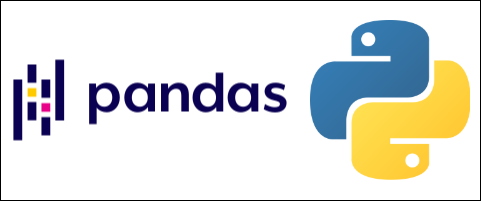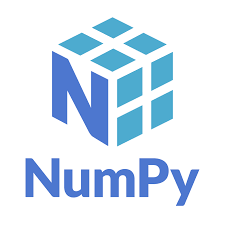

***

### <span style='font-family:"Roboto"'>**Data Preparation**

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;">
Import python libraries. Set the plot backgrounds to darkgrid

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
import matplotlib.ticker as mtick
sns.set(style='darkgrid')

##### <span style='font-family:"Roboto"'> Prepare data

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;">
Load the dataset

In [2]:
df = pd.read_excel(r"C:\Users\RonaldOnyango\Desktop\Misc\BIA Assignment.xlsx", index_col='Identifier')

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;">
View information about the dataset

In [3]:
df.head(5)

,joined_date,gender,age,last active date
Identifier,,,,
63697470ede7fa7e107227c5,2022-07-11 00:00:00,female,23.0,2022-11-08 00:00:00
636970fede80962555cb5e36,2022-07-11 00:00:00,male,22.0,2022-11-07 00:00:00
636963a7de80962555cb5e1f,2022-07-11 00:00:00,male,29.0,2022-11-07 00:00:00
636962fcde80962555cb5e15,2022-07-11 00:00:00,male,23.0,> 90 days
63696184de80962555cb5e0a,2022-07-11 00:00:00,male,26.0,2022-11-07 00:00:00


In [4]:
df.tail(5)

,joined_date,gender,age,last active date
Identifier,,,,
5ef5e8692ab4cf551d8bcfd5,6/26/2020,male,21.0,2022-11-08 00:00:00
5ef5dfdb2ab4cf551d8bcfd4,6/26/2020,Male,33.0,> 90 days
5ef5c38247d3881a6776532f,6/24/2020,NaN,23.0,> 90 days
5ef5c2a947d3881a6776532e,6/24/2020,NaN,23.0,> 90 days
5ef55d5747d3881a67765258,6/24/2020,NaN,23.0,2022-11-08 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142902 entries, 63697470ede7fa7e107227c5 to 5ef55d5747d3881a67765258
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   joined_date       142901 non-null  object 
 1   gender            130577 non-null  object 
 2   age               141917 non-null  float64
 3   last active date  142902 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


In [6]:
df.shape

(142902, 4)

In [7]:
df.size

571608

In [8]:
df.dtypes

joined_date          object
gender               object
age                 float64
last active date     object
dtype: object

In [9]:
df.describe()

,age
count,141917.000000
mean,25.119859
std,5.352209
min,18.000000
25%,22.000000
50%,24.000000
75%,27.000000
max,52.000000


<span style='font-family:"Roboto"'> At a glance, we already get an idea of top values per column 

In [10]:
df.columns

Index(['joined_date', 'gender', 'age', 'last active date'], dtype='object')

In [11]:
df.columns = df.columns.str.replace(' ','_')

***

### <span style='font-family:"Roboto"'>**Data Cleaning**

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;">
Count NULL rows in each column

In [12]:
df['joined_date'].isna().value_counts()

False    142901
True          1
Name: joined_date, dtype: int64

In [13]:
df['gender'].isna().value_counts()

False    130577
True      12325
Name: gender, dtype: int64

In [14]:
df['age'].isna().value_counts()

False    141917
True        985
Name: age, dtype: int64

In [15]:
df['last_active_date'].isna().value_counts()

False    142902
Name: last_active_date, dtype: int64

---
<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;">
Drop null values from the joined_date column.

In [16]:
df = df.dropna(subset =['joined_date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142901 entries, 63697470ede7fa7e107227c5 to 5ef55d5747d3881a67765258
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   joined_date       142901 non-null  object 
 1   gender            130577 non-null  object 
 2   age               141917 non-null  float64
 3   last_active_date  142901 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


In [18]:
df_ageMean = df['age'].mean()
df_ageMean

25.119858790701606

***
<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;">
Fill the null age rows with the calcluated mean. Fill Null gender rows with Other.

In [19]:
df['age'] = df['age'].fillna(df_ageMean)

In [20]:
df['age'] = df['age'].astype({"age": int})

In [21]:
df['gender'].value_counts()

male      91372
female    35851
Male       2023
Female     1319
Other        12
Name: gender, dtype: int64

<span style='font-family:"Roboto"'> Replace the sentence case gender values to lowercase.

In [22]:
df['gender'] = df['gender'].replace(['male', 'female'], ['Male', 'Female'])

In [23]:
df['gender'].value_counts()

Male      93395
Female    37170
Other        12
Name: gender, dtype: int64

In [24]:
df['gender'] = df['gender'].fillna('Other')

---
<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;">
Format date column to datetime format

In [25]:
df['joined_date'] = df['joined_date'].apply(lambda x: pd.to_datetime(x, errors='coerce')).dropna()

---
<span style = "font-family:Times New roman; font-size:1.1em;"><b>Columns</b></span> 
<div class="alert-block alert-info alert">
    <span style = "font-family:Times New roman; font-size:1.1em;">
        1. Add churn column indicating whether the user is active or not. A churned user is defined as user that has not been active for over 90 days.<br>
        2. Add a Churn Rate column with 1 as <b>Churned</b> and 0 as <b>Active</b> statuses.<br>
        3. Add count column. Set all values to 1<br>
        4. Create an age band column.
    </span>

In [26]:
df['churn'] = np.where(df['last_active_date'] == "> 90 days", "Churned", "Active")
df

,joined_date,gender,age,last_active_date,churn
Identifier,,,,,
63697470ede7fa7e107227c5,2022-07-11,Female,23,2022-11-08 00:00:00,Active
636970fede80962555cb5e36,2022-07-11,Male,22,2022-11-07 00:00:00,Active
636963a7de80962555cb5e1f,2022-07-11,Male,29,2022-11-07 00:00:00,Active
636962fcde80962555cb5e15,2022-07-11,Male,23,> 90 days,Churned
63696184de80962555cb5e0a,2022-07-11,Male,26,2022-11-07 00:00:00,Active
...,...,...,...,...,...
5ef5e8692ab4cf551d8bcfd5,2020-06-26,Male,21,2022-11-08 00:00:00,Active
5ef5dfdb2ab4cf551d8bcfd4,2020-06-26,Male,33,> 90 days,Churned
5ef5c38247d3881a6776532f,2020-06-24,Other,23,> 90 days,Churned


<span style='font-family:"Roboto"'> Add Churn Rate column

In [27]:
df['churn_rate'] = np.where(df['churn'] == "Churned", 1, 0)

In [28]:
df['count'] = 1
df

,joined_date,gender,age,last_active_date,churn,churn_rate,count
Identifier,,,,,,,
63697470ede7fa7e107227c5,2022-07-11,Female,23,2022-11-08 00:00:00,Active,0,1
636970fede80962555cb5e36,2022-07-11,Male,22,2022-11-07 00:00:00,Active,0,1
636963a7de80962555cb5e1f,2022-07-11,Male,29,2022-11-07 00:00:00,Active,0,1
636962fcde80962555cb5e15,2022-07-11,Male,23,> 90 days,Churned,1,1
63696184de80962555cb5e0a,2022-07-11,Male,26,2022-11-07 00:00:00,Active,0,1
...,...,...,...,...,...,...,...
5ef5e8692ab4cf551d8bcfd5,2020-06-26,Male,21,2022-11-08 00:00:00,Active,0,1
5ef5dfdb2ab4cf551d8bcfd4,2020-06-26,Male,33,> 90 days,Churned,1,1
5ef5c38247d3881a6776532f,2020-06-24,Other,23,> 90 days,Churned,1,1


In [29]:
df['AgeBand'] = np.where(df['last_active_date'] == "> 90 days", "Churned", "Active")

conditions =[
    (df['age']<20),
    (df['age']>=20) & (df['age']<25),
    (df['age']>=25) & (df['age']<31),
    (df['age']>=31) & (df['age']<36),
    (df['age']>35)
]
values = ['Under 20', '20 and 24', '25 and 30', '31 and 35', 'Above 35']
df['AgeBand'] = np.select(conditions, values)

In [30]:
churn_rate = df['churn_rate'].value_counts()
churn_rate

1    135353
0      7548
Name: churn_rate, dtype: int64

In [31]:
churn_counts = df['churn'].value_counts()
churn_counts

Churned    135353
Active       7548
Name: churn, dtype: int64

In [32]:
AgeBand_count = df['AgeBand'].value_counts()
AgeBand_count

20 and 24    72766
25 and 30    43442
31 and 35    11010
Under 20      8316
Above 35      7367
Name: AgeBand, dtype: int64

In [33]:
df.describe()

,age,churn_rate,count
count,142901.000000,142901.000000,142901.0
mean,25.119033,0.947180,1.0
std,5.333759,0.223674,0.0
min,18.000000,0.000000,1.0
25%,22.000000,1.000000,1.0
50%,24.000000,1.000000,1.0
75%,27.000000,1.000000,1.0
max,52.000000,1.000000,1.0


***

### <span style='font-family:"Roboto"'>**Visualization**

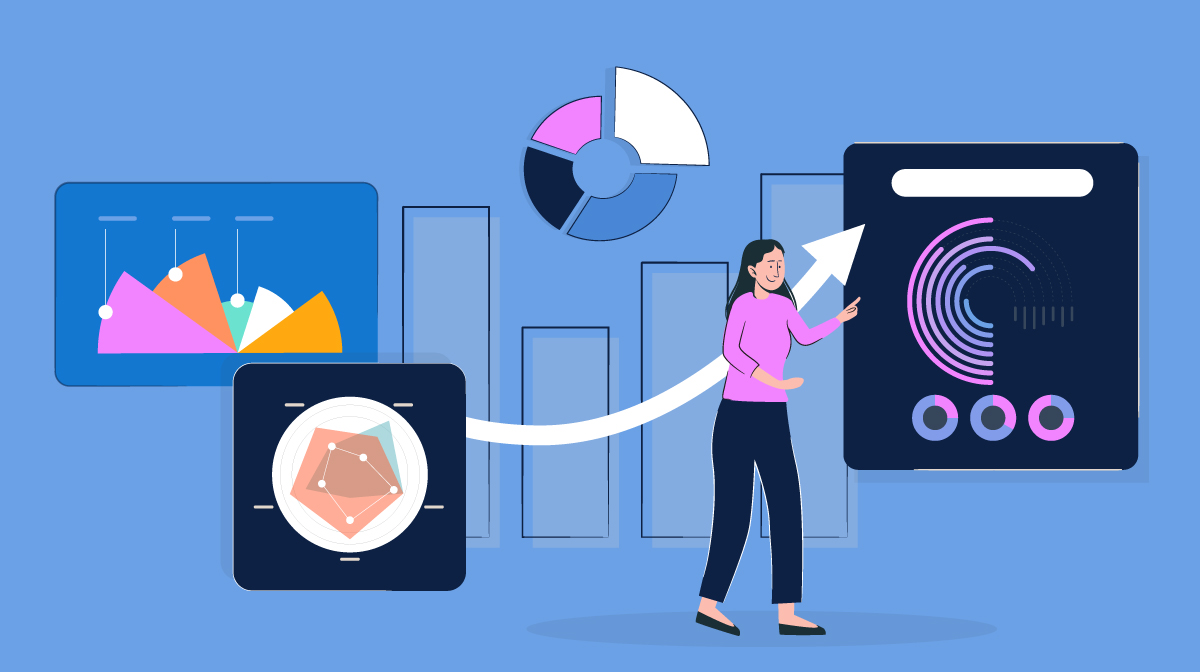

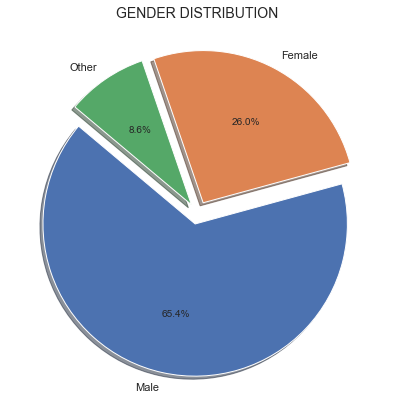

In [34]:
gender_counts = df['gender'].value_counts()

churn_label = ['Male', "Female", 'Other']
explode = (0.07, 0.08, 0.07)
fig = plt.figure(figsize =(10, 7))
plt.pie(gender_counts, labels = churn_label,autopct='%1.1f%%', shadow=True, startangle=140, explode = explode)
plt.title(label="GENDER DISTRIBUTION", fontsize=14)
plt.show()

<div class="alert-block alert-info alert">
    <span style = "font-family:Times New roman; font-size:1.1em;">
        The percentage distribution of males is <b>65%.4</b>, females is <b>26.0%</b> and Other is <b>8.6%</b>
        


***

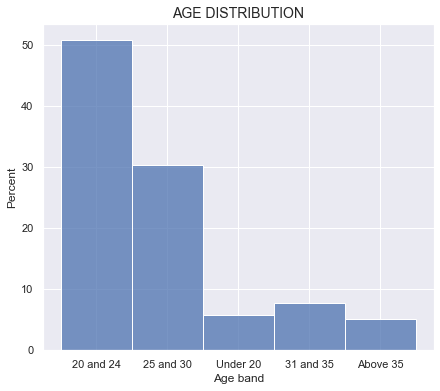

In [35]:
fig = plt.figure(figsize =(7, 6))
sns.histplot(df['AgeBand'],stat='percent')
plt.title(label="AGE DISTRIBUTION",fontsize=14)
plt.xlabel('Age band', fontsize=12)
plt.ylabel('Percent', fontsize=12)
plt.xticks(rotation=0)
plt.show();

<div class="alert-block alert-info alert">
    <span style = "font-family:Times New roman; font-size:1.1em;">
        Users between the ages of 20 and 24 account for approximately 52% of all users. The age groups under 20 and over 35 have the lowest percentage of users.

***

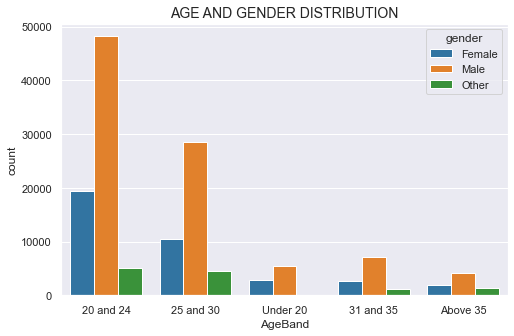

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x='AgeBand',data=df, hue= 'gender', palette='tab10')
plt.title('AGE AND GENDER DISTRIBUTION', fontsize=14);

<div class="alert-block alert-info alert">
    <span style = "font-family:Times New roman; font-size:1.1em;">
        The majority of males and females are between the ages of <b>20 and 24</b>. Each age group has a higher proportion of males than females.
    </span>
</div>

***

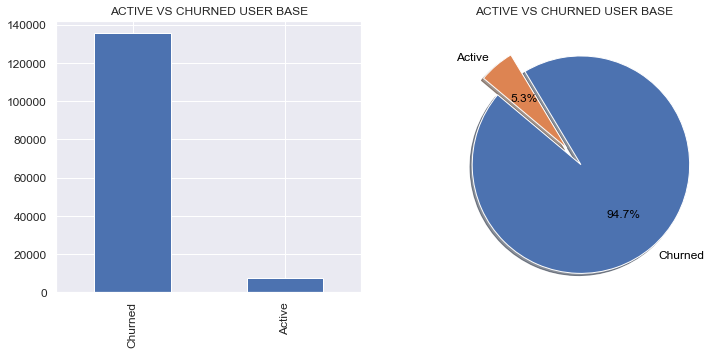

In [37]:
fig, axes = plt.subplots(1 , 2, figsize=(12,5))
churn_counts.plot(ax = axes[0],  kind='bar', fontsize =12, title = 'ACTIVE VS CHURNED USER BASE')
churn_counts.plot(ax = axes[1],  kind='pie', fontsize =12, title = 'ACTIVE VS CHURNED USER BASE', ylabel=' ', explode = (0.1, 0.1), shadow = True, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'});

<div class="alert-block alert-info alert">
    <span style = "font-family:Times New roman; font-size:1.1em;">
        The churned users account for 94.7% of the total users in the dataset. The proportion of active users is 5.3%.
    </span>
</div>

***

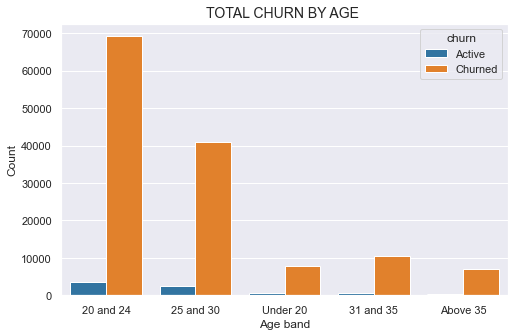

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='AgeBand',data=df, hue= 'churn', palette='tab10')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age band', fontsize=12)
plt.title('TOTAL CHURN BY AGE ', fontsize=14);

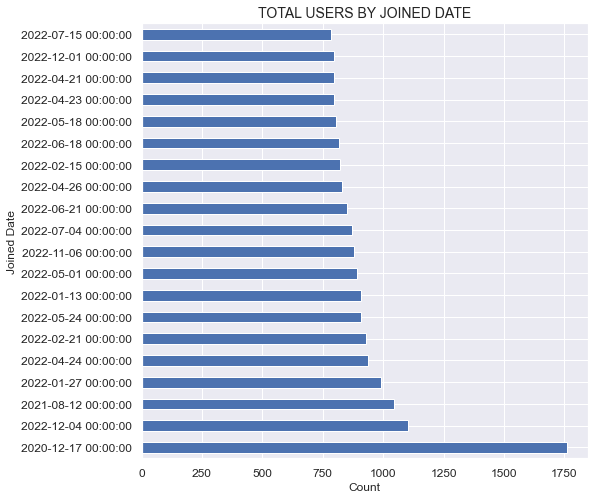

In [39]:
plt.figure(figsize=(8,8))
joined_date_counts = df.joined_date.value_counts()
joined_date_counts[:20].plot(kind='barh', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Joined Date', fontsize=12)
plt.title('TOTAL USERS BY JOINED DATE', fontsize=14);

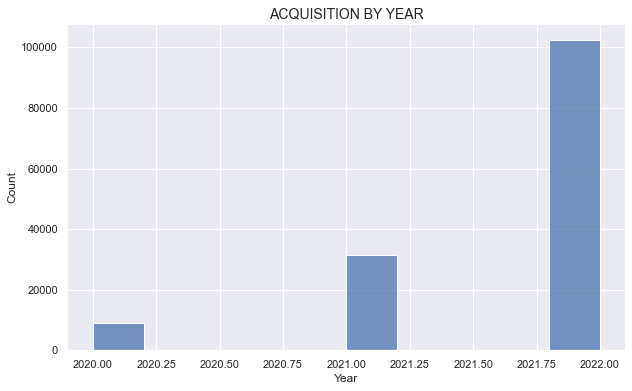

In [40]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df.joined_date.dt.year, bins=10, kde=False)
plt.title('ACQUISITION BY YEAR', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

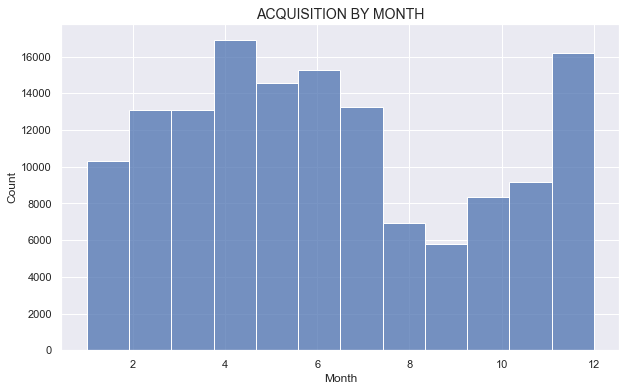

In [41]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df.joined_date.dt.month, bins=12, kde=False)
plt.title('ACQUISITION BY MONTH', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

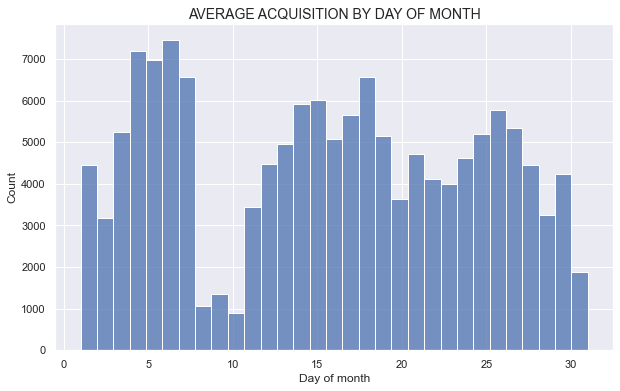

In [42]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df.joined_date.dt.day, bins=31, kde=False)
plt.title('AVERAGE ACQUISITION BY DAY OF MONTH', fontsize = 14)
plt.xlabel('Day of month', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

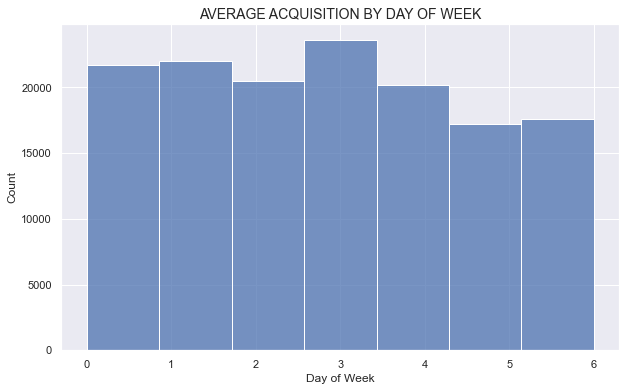

In [43]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df.joined_date.dt.dayofweek, bins=7, kde=False)
plt.title('AVERAGE ACQUISITION BY DAY OF WEEK', fontsize = 14)
plt.xlabel('Day of Week', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

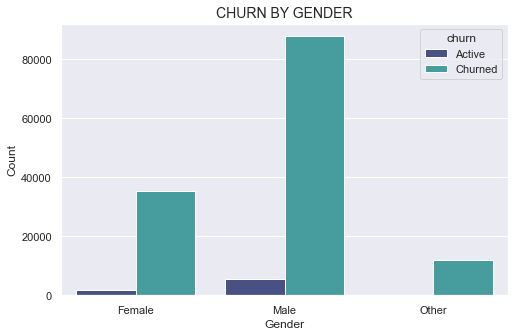

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender',data=df, hue= 'churn', palette='mako')
plt.title('CHURN BY GENDER', fontsize=14)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

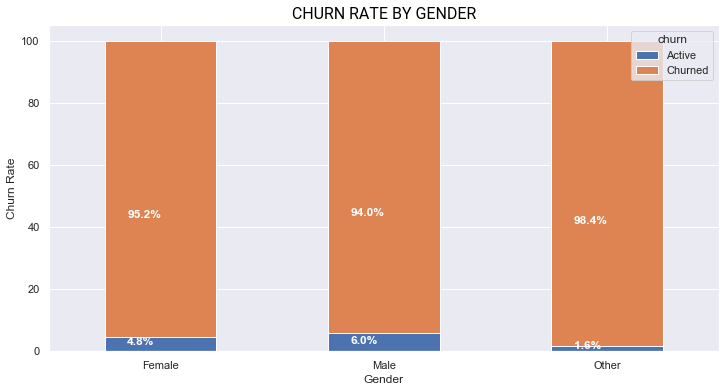

In [45]:
font1 = {'family':'roboto','color':'black','size':16}
ax = ((df.groupby('gender')['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, figsize=(12, 6))
)
plt.title("CHURN RATE BY GENDER", fontdict=font1)
ax.set_ylabel('Churn Rate',size = 12)
ax.set_xlabel('Gender', size = 12)
plt.xticks(rotation=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.2*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')

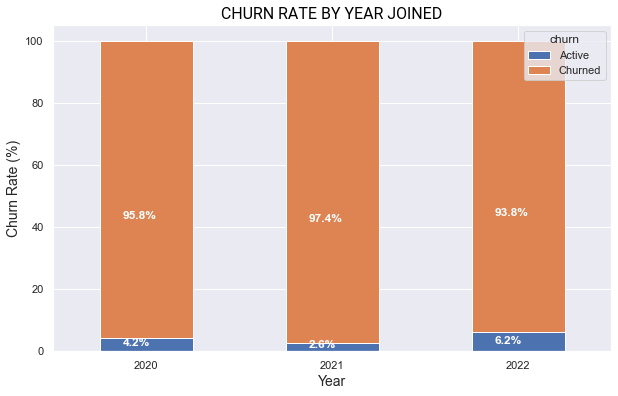

In [46]:
font1 = {'family':'roboto','color':'black','size':16}

ax = ((df.groupby(lambda x: df['joined_date'][x].year)['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, rot =0 ,figsize=(10, 6))
)
plt.title("CHURN RATE BY YEAR JOINED", fontdict=font1)
ax.set_ylabel(f'Churn Rate (%)',size = 14 )
ax.set_xlabel('Year', size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')

- It seems most users churned in 2021
- The same year had the lowest active user base

<span style='font-family:"Roboto"'> **Average Churn Rate by Month Joined over the 3-Year period**

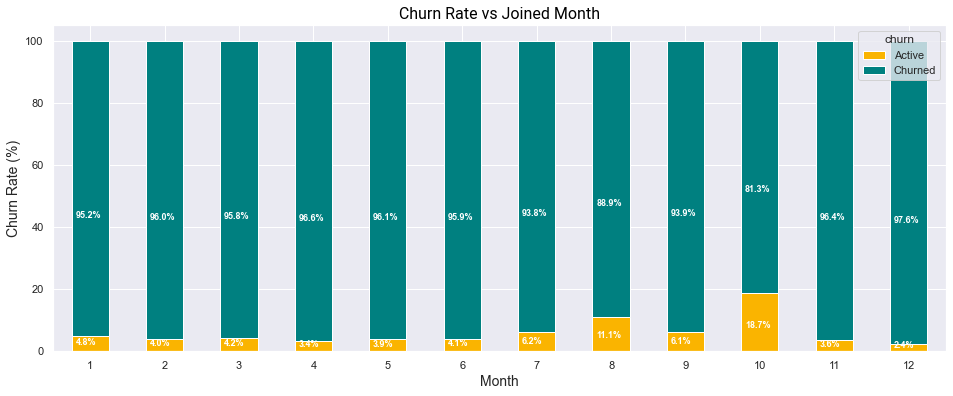

In [47]:
font1 = {'family':'roboto','color':'black','size':16}
ax = ((df.groupby(lambda x: df['joined_date'][x].month)['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, rot =0 ,figsize=(16, 6), color = ['#fab400', '#008080'])
)
plt.title("Churn Rate vs Joined Month", fontdict=font1)
ax.set_ylabel(f'Churn Rate (%)',size = 14 )
ax.set_xlabel('Month', size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.1*width, p.get_y()+.4*height), fontsize=9,
            color='white',
           weight = 'bold')

<span style='font-family:"Roboto"'> **Average Daily Churn Rate**

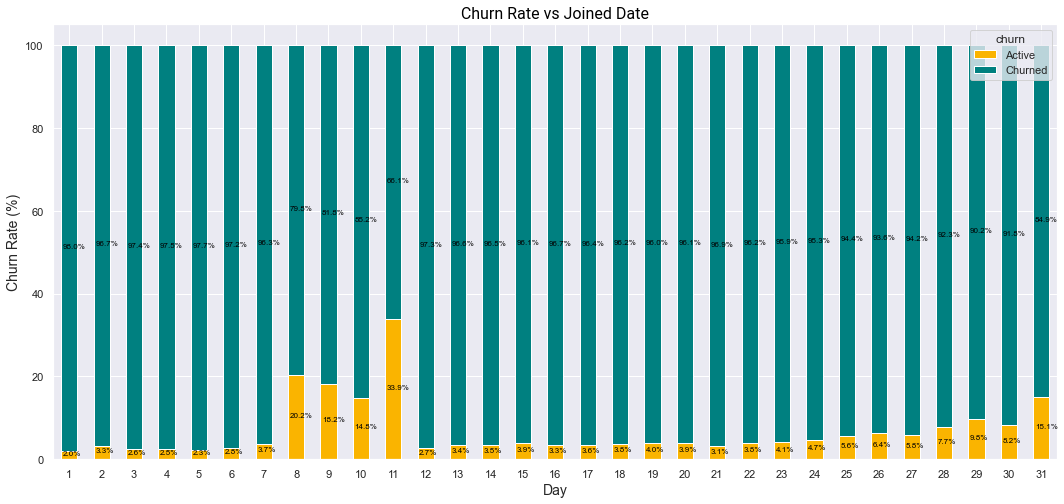

In [48]:
font1 = {'family':'roboto','color':'black','size':16}
ax = ((df.groupby(lambda x: df['joined_date'][x].day)['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, rot =0 ,figsize=(18, 8), color = ['#fab400', '#008080'])
)
plt.title("Churn Rate vs Joined Date", fontdict=font1)
ax.set_ylabel(f'Churn Rate (%)',size = 14 )
ax.set_xlabel('Day', size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.1*width, p.get_y()+.5*height), fontsize=8,
            color='black',
           weight = 'normal')

Females have a higher churn rate to males

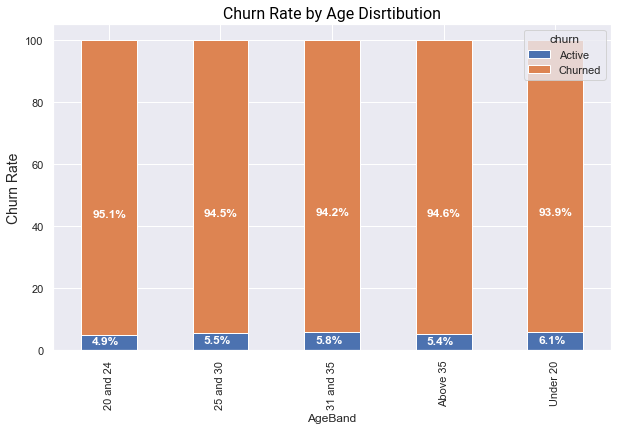

In [49]:
font1 = {'family':'roboto','color':'black','size':16}
ax = ((df.groupby('AgeBand')['churn'].value_counts(normalize=True)* 100.0)
   .unstack('churn').plot.bar(stacked=True, figsize=(10, 6))
)
plt.title("Churn Rate by Age Disrtibution", fontdict=font1)
ax.set_ylabel('Churn Rate',size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.2*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')

Users between ages 20 and 24 are more likely to churn compared to other age groups

***

### <span style='font-family:"Roboto"'>**Conclusion**

1. The total number of males outnumbers females by **43%**.
2. The age group between **20** and **24** has the highest percentage of users (**51%**), accounting for more than half of all users, but they also have the highest churn rate.
3. The year **2021** has the highest churn rate. 
    - December new users have a higher overall churn rate.
    - Users who join in August and October have a lower churn rate than users who join in other months.
    - Users who join between dates 8 and 11, as well as between dates 25 and 31, have a lower churn rate.
4. **Females** have a significantly higher churn rate than males and other genders.
5. The overall churn rate is approximately **94%**.

<div class="alert alert-block alert-success">
<b>In Progress:</b> I'll continue exploring the data further, and create a churn prediction model
</div>